In [1]:
!pip install matplotlib


In [2]:
import random
import time
import matplotlib.pyplot as plt

def search_in_sequence(sequence, value):
    return value in sequence

def generate_random_sequence(length):
    return random.sample(range(1, length + 1), length)

def plot_time_complexity(x, y_start, y_middle, y_end):
    plt.plot(x, y_start, marker='o', label='Start')
    plt.plot(x, y_middle, marker='o', label='Middle')
    plt.plot(x, y_end, marker='o', label='End')
    plt.xlabel('Sequence Length')
    plt.ylabel('Average Time (seconds)')
    plt.title('Search Time for Different Positions in a Sequence')
    plt.legend()
    plt.grid(True)
    plt.show()

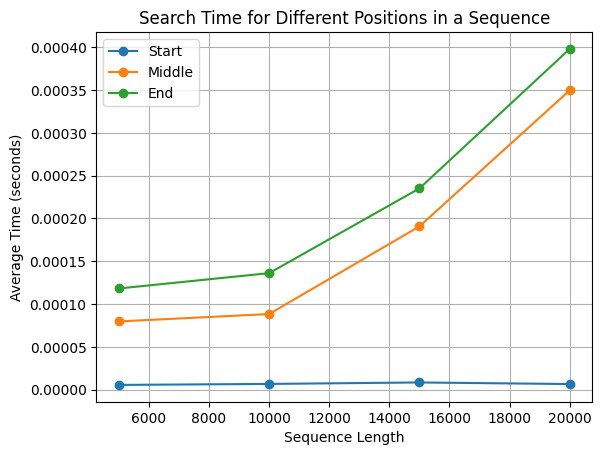

In [3]:
sequence_lengths = [5000, 10000, 15000, 20000]
num_trials = 500

search_positions = ['Start', 'Middle', 'End']
average_times = {position: [] for position in search_positions}

for length in sequence_lengths:
    times = {position: 0 for position in search_positions}

    for _ in range(num_trials):
        sequence = generate_random_sequence(length)

        value_start = sequence[0]
        value_middle = sequence[length // 2]
        value_end = sequence[-1]

        # Search for Start
        start_time = time.time()
        search_in_sequence(sequence, value_start)
        times['Start'] += time.time() - start_time
        start_time = time.time()
        search_in_sequence(sequence, value_middle)
        times['Middle'] += time.time() - start_time

        # Search for End
        start_time = time.time()
        search_in_sequence(sequence, value_end)
        times['End'] += time.time() - start_time

    for position in search_positions:
        average_times[position].append(times[position] / num_trials)

plot_time_complexity(sequence_lengths, average_times['Start'], average_times['Middle'], average_times['End'])